# Historical Coal Production Data: 2021

# Source: The U.S. Energy Information Administration (EIA) and the U.S. Mine Safety and Health Administration

## Importing Necessary Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [24]:
import warnings
warnings.filterwarnings("ignore")

## Data Import

In [25]:
data_coal = pd.read_csv('COAL_UNFILTERED.csv')
data_coal.head(10)

,Year,Mine Name,Mine Status,Mine Type,Production (short tons),Average Employees,Labor Hours
0,2021,Dodge Mine,Active,Surface,0,4,"8,183"
1,2021,John Poe Mine,Active,Surface,"6,487",2,820
2,2021,Oak Grove Preparation Plant,Active,Underground,0,53,"1,16,182"
3,2021,Flat Top Mine,Active,Surface,"2,03,190",42,"1,17,312"
4,2021,Oak Grove Mine,Active,Underground,"20,20,277",461,"11,00,028"
5,2021,No 7 Mine,Active,Underground,"47,93,699",514,"15,02,426"
6,2021,Pratt No. 1 Mine,Active,Surface,0,10,"25,789"
7,2021,Narley Mine,Active,Surface,130,3,"2,757"
8,2021,Maxine-Pratt Mine,Active,Underground,"96,907",27,"53,479"
9,2021,Black Warrior Mine No 1,Active,Surface,"1,56,423",50,"1,23,270"


In [26]:
data_coal['Labor Hours'] = data_coal['Labor Hours'].str.replace(',', '')
data_coal['Production (short tons)'] = data_coal['Production (short tons)'].str.replace(',', '')
data_coal = data_coal.astype({'Labor Hours': 'int64'})
data_coal = data_coal.astype({'Production (short tons)': 'int64'})
data_coal.dtypes

Year                        int64
Mine Name                  object
Mine Status                object
Mine Type                  object
Production (short tons)     int64
Average Employees           int64
Labor Hours                 int64
dtype: object

In [27]:
data_coal = data_coal.drop(['Mine Name'], axis=1)
data_coal.head(10)

,Year,Mine Status,Mine Type,Production (short tons),Average Employees,Labor Hours
0,2021,Active,Surface,0,4,8183
1,2021,Active,Surface,6487,2,820
2,2021,Active,Underground,0,53,116182
3,2021,Active,Surface,203190,42,117312
4,2021,Active,Underground,2020277,461,1100028
5,2021,Active,Underground,4793699,514,1502426
6,2021,Active,Surface,0,10,25789
7,2021,Active,Surface,130,3,2757
8,2021,Active,Underground,96907,27,53479
9,2021,Active,Surface,156423,50,123270


In [28]:
data_coal.describe()

,Year,Production (short tons),Average Employees,Labor Hours
count,727.0,7.270000e+02,727.000000,7.270000e+02
mean,2021.0,7.942659e+05,54.357634,1.184080e+05
std,0.0,3.764503e+06,111.796592,2.480994e+05
min,2021.0,0.000000e+00,0.000000,2.000000e+00
25%,2021.0,0.000000e+00,5.000000,8.006000e+03
50%,2021.0,2.273400e+04,14.000000,2.809100e+04
75%,2021.0,1.868135e+05,42.000000,9.550400e+04
max,2021.0,6.279900e+07,997.000000,2.075068e+06


In [29]:
data_coal.columns

Index(['Year', 'Mine Status', 'Mine Type', 'Production (short tons)',
       'Average Employees', 'Labor Hours'],
      dtype='object')

In [30]:
data_coal.shape

(727, 6)

## Normalising Data

In [31]:
upper_lim1 =  data_coal['Production (short tons)'].mean() +  data_coal['Production (short tons)'].std() * 3
lower_lim1 =  data_coal['Production (short tons)'].mean() -  data_coal['Production (short tons)'].std() * 3
upper_lim2 =  data_coal['Labor Hours'].mean() + data_coal['Labor Hours'].std() * 3
lower_lim2 =  data_coal['Labor Hours'].mean() - data_coal['Labor Hours'].std() * 3
upper_lim3 =  data_coal['Average Employees'].mean() + data_coal['Average Employees'].std() * 3
lower_lim3 =  data_coal['Average Employees'].mean() - data_coal['Average Employees'].std() * 3

In [32]:

data_coal =   data_coal[((data_coal['Production (short tons)']< upper_lim1) & (data_coal['Production (short tons)'] > lower_lim1) & 
                        (data_coal['Labor Hours']< upper_lim2) & (data_coal['Labor Hours'] > lower_lim2) &
                        (data_coal['Average Employees']< upper_lim3) & (data_coal['Average Employees'] > lower_lim3))]
data_coal = data_coal.reset_index(drop=True)
data_coal.describe()

,Year,Production (short tons),Average Employees,Labor Hours
count,699.0,6.990000e+02,699.000000,699.000000
mean,2021.0,3.455343e+05,37.097282,80245.340486
std,0.0,1.096777e+06,61.342448,135864.528097
min,2021.0,0.000000e+00,0.000000,2.000000
25%,2021.0,0.000000e+00,5.000000,7440.500000
50%,2021.0,1.752200e+04,13.000000,25560.000000
75%,2021.0,1.524525e+05,34.000000,77329.500000
max,2021.0,1.160174e+07,371.000000,787575.000000


In [33]:
data_coal.dtypes

Year                        int64
Mine Status                object
Mine Type                  object
Production (short tons)     int64
Average Employees           int64
Labor Hours                 int64
dtype: object

## Feature Engineering

In [34]:
data_coal["F"] = data_coal["Labor Hours"] * data_coal["Average Employees"]

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# data = data_coal.copy(deep = True)
# min_max_scaler = MinMaxScaler()
scaler = StandardScaler()
# data.iloc[:, [4, 5, 6]] = min_max_scaler.fit_transform(data.iloc[:, [4, 5, 6]])
# data.head()
x = data_coal.iloc[:, 3:]
x = scaler.fit_transform(x)

In [36]:
data_coal

,Year,Mine Status,Mine Type,Production (short tons),Average Employees,Labor Hours,F
0,2021,Active,Surface,0,4,8183,32732
1,2021,Active,Surface,6487,2,820,1640
2,2021,Active,Underground,0,53,116182,6157646
3,2021,Active,Surface,203190,42,117312,4927104
4,2021,Active,Surface,0,10,25789,257890
...,...,...,...,...,...,...,...
694,2021,Active,Refuse,117182,5,12200,61000
695,2021,Active,Refuse,51972,53,744,39432
696,2021,Active,Refuse,161088,9,16314,146826
697,2021,Active,Refuse,38883,8,13951,111608


In [37]:
df1 = data_coal[['Year', 'Mine Type']]
df1

,Year,Mine Type
0,2021,Surface
1,2021,Surface
2,2021,Underground
3,2021,Surface
4,2021,Surface
...,...,...
694,2021,Refuse
695,2021,Refuse
696,2021,Refuse
697,2021,Refuse


In [38]:
df2 = pd.DataFrame(x, columns=['Production (short tons)', 'Average Employees','Labor Hours', 'F'])
scaled_df = pd.concat([df1, df2], axis=1)
scaled_df

,Year,Mine Type,Production (short tons),Average Employees,Labor Hours,F
0,2021,Surface,-0.315271,-0.539936,-0.530778,-0.313849
1,2021,Surface,-0.309352,-0.572563,-0.585011,-0.314722
2,2021,Underground,-0.315271,0.259431,0.264693,-0.141889
3,2021,Surface,-0.129877,0.079981,0.273016,-0.176437
4,2021,Surface,-0.315271,-0.442054,-0.401101,-0.307528
...,...,...,...,...,...,...
694,2021,Refuse,-0.208352,-0.523622,-0.501191,-0.313055
695,2021,Refuse,-0.267851,0.259431,-0.585571,-0.313661
696,2021,Refuse,-0.168292,-0.458368,-0.470889,-0.310646
697,2021,Refuse,-0.279793,-0.474681,-0.488294,-0.311635


In [39]:
scaled_df.isnull().sum()

Year                       0
Mine Type                  0
Production (short tons)    0
Average Employees          0
Labor Hours                0
F                          0
dtype: int64

In [40]:
scaled_df.describe()

,Year,Production (short tons),Average Employees,Labor Hours,F
count,699.0,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02
mean,2021.0,1.524770e-17,1.270642e-17,2.541283e-18,-1.270642e-17
std,0.0,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00
min,2021.0,-3.152707e-01,-6.051902e-01,-5.910358e-01,-3.147680e-01
25%,2021.0,-3.152707e-01,-5.236222e-01,-5.362472e-01,-3.136915e-01
50%,2021.0,-2.992834e-01,-3.931134e-01,-4.027872e-01,-3.054781e-01
75%,2021.0,-1.761708e-01,-5.052781e-02,-2.147675e-02,-2.425938e-01
max,2021.0,1.027033e+01,5.447155e+00,5.209867e+00,7.556934e+00


## LabelEncoding the Mine Type Column

In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
scaled_df['Mine Type'] = label_encoder.fit_transform(scaled_df['Mine Type'])
scaled_df.head()

,Year,Mine Type,Production (short tons),Average Employees,Labor Hours,F
0,2021,1,-0.315271,-0.539936,-0.530778,-0.313849
1,2021,1,-0.309352,-0.572563,-0.585011,-0.314722
2,2021,2,-0.315271,0.259431,0.264693,-0.141889
3,2021,1,-0.129877,0.079981,0.273016,-0.176437
4,2021,1,-0.315271,-0.442054,-0.401101,-0.307528


In [42]:
# poly = PolynomialFeatures(interaction_only = True)
# xx = poly.fit_transform(X)
# xx.shape, X.shape
# feng = []
# for i in range(scaled_df.shape[0]):
#     feng.append(scaled_df['Average Employees'][i]*scaled_df['Labor Hours'][i])
# scaled_df['feat_eng'] = feng

# Plotting Heatmap to see the correlation between different parameters

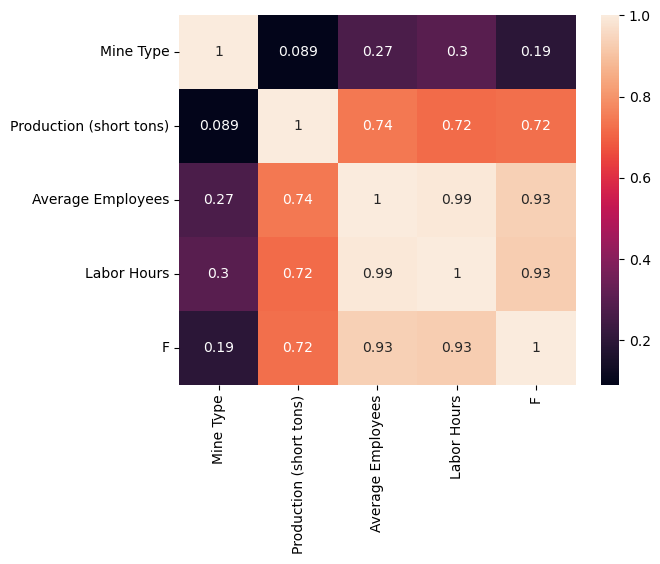

In [43]:
import seaborn as sns

g = sns.heatmap(scaled_df.drop('Year', axis = 'columns').corr(), annot=True)

fig = g.get_figure()
fig.savefig("HeatMap.png")
plt.show(g)


# PairPlot

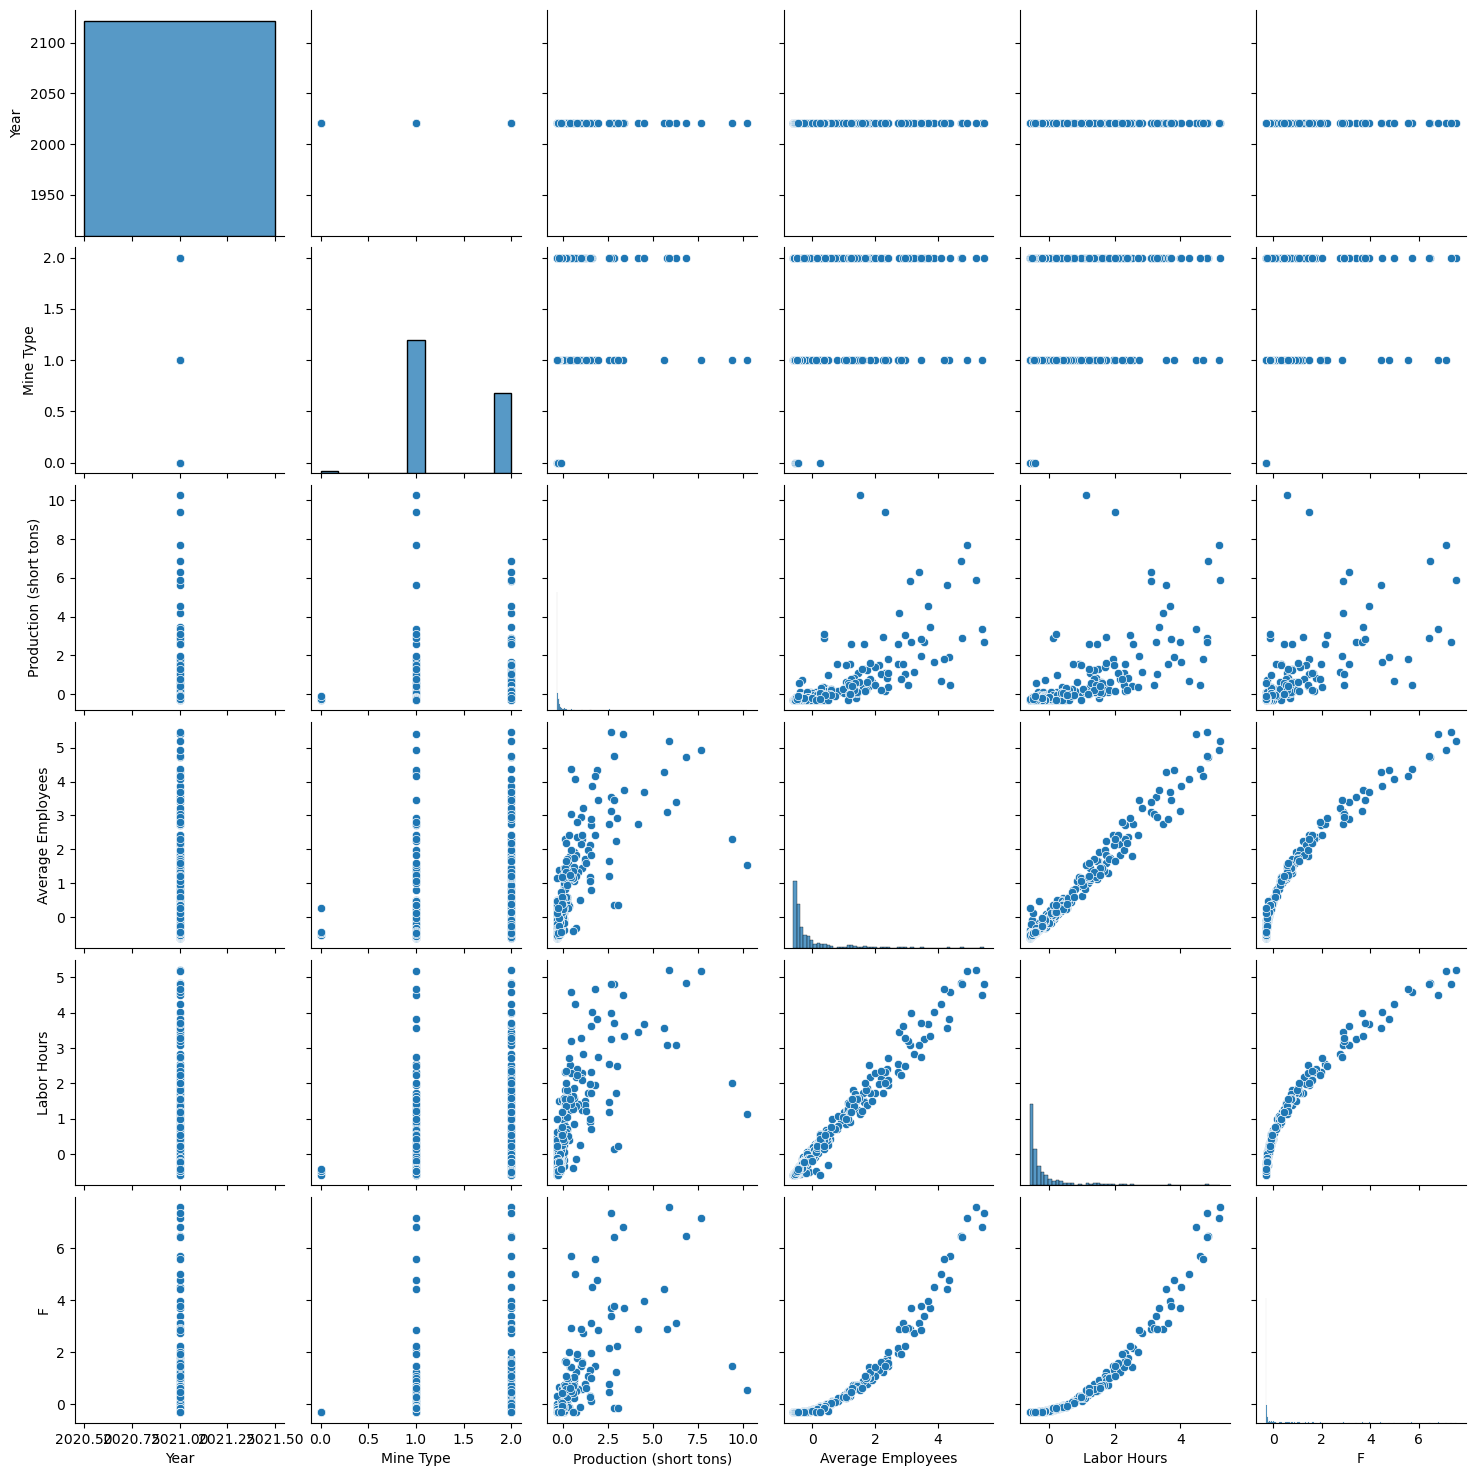

In [44]:
pp = sns.pairplot(scaled_df)
pp.figure.savefig("Pair_Plot.png")


In [45]:
input_params = ['Average Employees', 'Labor Hours', 'Mine Type', 'F']

## Splitting Data into test and train data

In [46]:
X = scaled_df[input_params]
# X = poly.fit_transform(X)
y = scaled_df['Production (short tons)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


# Using Multivariate Linear Regression Model

In [47]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = regressor.predict(X_test)


# Matching predicted values and test values

In [49]:
y_pred

array([-0.3650601 ,  1.06955466,  0.78382697, -0.23468431, -0.33404354,
        1.5933314 , -0.275988  , -0.29444325, -0.56218713, -0.12314664,
       -0.24332423, -0.16713423, -0.29992171, -0.2979476 , -0.18991136,
       -0.22058213, -0.29442413, -0.16137426, -0.25207848, -0.41732164,
       -0.28328763,  1.22703497, -0.32636808,  0.21599836, -0.2042449 ,
       -0.30520024, -0.15458452, -0.32129727, -0.35970895, -0.06456976,
       -0.17812449,  0.03273459, -0.52733607, -0.25206392, -0.27112371,
       -0.51630639,  2.86327848, -0.25561732, -0.312761  ,  2.16828843,
       -0.25413989, -0.24863378, -0.3627638 , -0.0570321 , -0.50053702,
       -0.13779685,  2.27615029,  0.68783358, -0.2828408 , -0.41497058,
       -0.04748265, -0.18983128, -0.2612086 , -0.17956035, -0.2382782 ,
       -0.34949977, -0.23372225, -0.32021515, -0.27851229, -0.53188055,
       -0.43492437, -0.08434841,  0.00803436, -0.00792794, -0.32975675,
        0.84613737,  0.04776415, -0.36506742, -0.30204551, -0.24

In [50]:
y_test.to_numpy()

array([-0.31527071,  1.52594439, -0.20840319, -0.16760912, -0.31527071,
        1.09095967, -0.31527071, -0.31527071, -0.31527071, -0.19892685,
       -0.31527071, -0.12969463, -0.31317581, -0.31193583, -0.19970149,
       -0.31527071, -0.31527071, -0.15632164, -0.2515294 , -0.26749666,
       -0.31527071,  1.07566395, -0.31256358, -0.0766085 , -0.18047326,
       -0.31527071, -0.10294262, -0.30314015, -0.31527071, -0.22441152,
       -0.20530828, -0.21517788, -0.31527071, -0.24318902, -0.15808807,
       -0.31527071,  2.67093942, -0.21219519, -0.29407714,  1.81997285,
       -0.31527071, -0.30700149, -0.22271716, -0.27979328, -0.31249241,
       -0.1615005 ,  2.60498641,  0.12740658, -0.25903128, -0.27729326,
       -0.16829161, -0.22004287, -0.12337068,  0.02367959, -0.27497664,
       -0.2874603 , -0.30549783, -0.17468581, -0.31527071, -0.31527071,
       -0.31527071, -0.17231627, -0.07504827, -0.1292001 , -0.31527071,
        1.50441231, -0.04146136, -0.31527071, -0.31527071, -0.31

In [51]:
regressor.score(X_train, y_train)

0.5683747346192272

## Regressor Score of Test Data

In [52]:
regressor.score(X_test, y_test)

0.7027047122007122

## Predicting Test Data

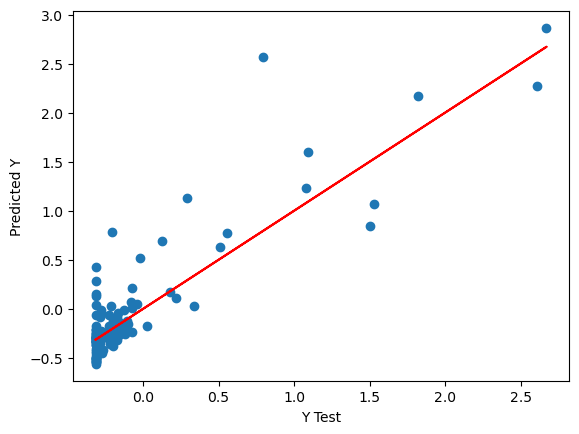

In [53]:
# Predicting Test Data

plt.scatter(y_test,y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.savefig("Predicted Y_Y Test.png")

# Predicting values based on certain input

In [54]:
regressor.predict([[5000, 20000, 0, 100000000]])

array([16609089.51820005])

# Evaluating Data

In [55]:
X_test

,Average Employees,Labor Hours,Mine Type,F
476,-0.327859,-0.340600,2,-0.298539
240,1.189306,0.919998,1,0.318800
19,1.401382,1.514368,2,0.672342
146,-0.376800,-0.335216,1,-0.301116
51,-0.539936,-0.504476,1,-0.313448
...,...,...,...,...
248,-0.344173,-0.361025,1,-0.300739
172,-0.539936,-0.528937,2,-0.313821
655,-0.572563,-0.555387,1,-0.314496
417,-0.490995,-0.465188,1,-0.311410


In [56]:
coeffecients = pd.DataFrame(regressor.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Average Employees,1.345997
Labor Hours,-0.722382
Mine Type,-0.200568
F,0.166168


# Checking for errors

In [57]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.14689981573713531
MSE: 0.06932409436404845
RMSE: 0.2632946911049451


# Residual Plot

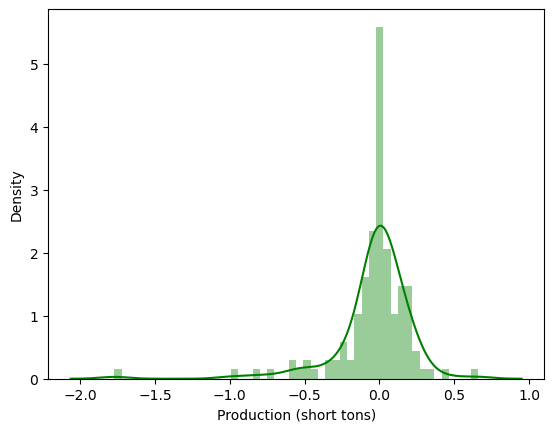

In [58]:
#Residuals

rp = sns.distplot((y_test-y_pred),bins=50, color ='green');

fig = rp.get_figure()
fig.savefig("Residual Plot.png")
plt.show(rp)